In [ ]:
import urllib.request

url1 = "https://github.com/ladofa/edu/raw/master/samples/sudoku.png"
url2 = "https://github.com/ladofa/edu/raw/master/samples/seven.png"

urllib.request.urlretrieve(url1, "sudoku.png")
urllib.request.urlretrieve(url2, "seven.png")

print("다운로드 완료")

다운로드 완료


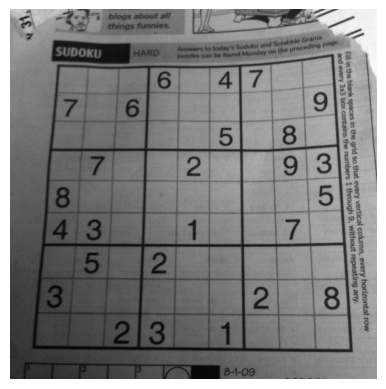

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread('sudoku.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(src, cmap = 'gray')
plt.axis("off")
plt.show()

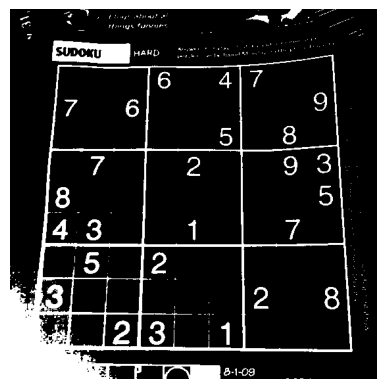

In [18]:
src2 = np.uint8(src < 60) * 255

plt.imshow(src2, cmap='gray')
plt.axis("off")
plt.show()

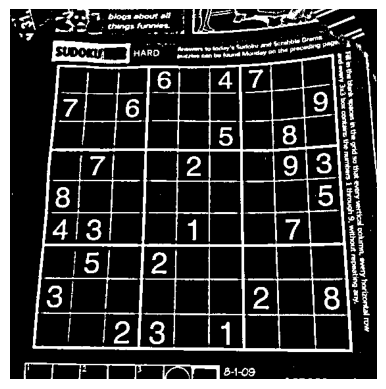

In [20]:
src3 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, +10)

plt.imshow(src3, cmap='gray')
plt.axis("off")
plt.show()

In [ ]:
#colab

#cv2_imshow(src3)
#back = cv2.dilate(src, np.ones((3, 3), np.uint8), iterations=6)
#back = cv2.erode(back, np.ones((3, 3), np.uint8), iterations=6)
#cv2_imshow(back)

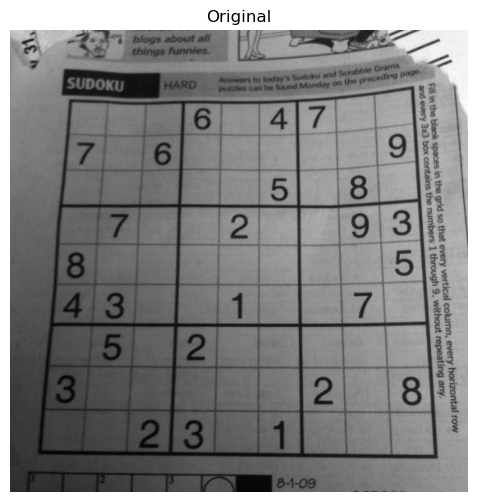

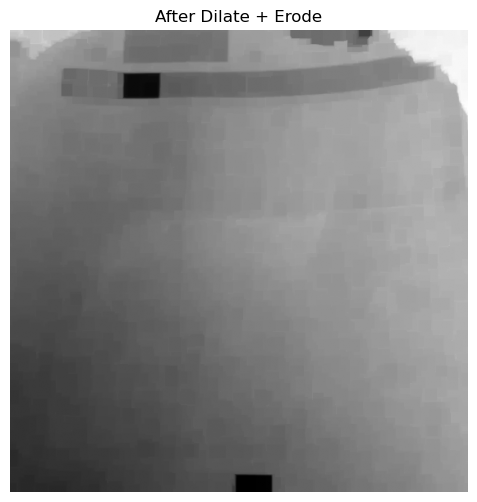

In [25]:
plt.figure(figsize=(6,6))
plt.imshow(src, cmap='gray')
plt.title("Original")
plt.axis("off")
plt.show()

kernel = np.ones((3, 3), np.uint8)
back = cv2.dilate(src, kernel, iterations=6)
back = cv2.erode(back, kernel, iterations=6)

plt.figure(figsize=(6,6))
plt.imshow(back, cmap='gray')
plt.title("After Dilate + Erode")
plt.axis("off")
plt.show()

In [ ]:
#colab

#back = cv2.dilate(src, np.ones((3, 3), np.uint8), iterations=6)
#back = cv2.erode(back, np.ones((3, 3), np.uint8), iterations=6)
#fore = cv2.absdiff(back, src) #absolute difference
# fore = np.abs(back.astype(np.int32)-src.astype(np.int32)).astype(np.uint8)
#cv2_imshow(back)
#cv2_imshow(fore)
# np.uint8(fore > 15) * 255
#_, bin = cv2.threshold(fore, 15, 255, cv2.THRESH_BINARY)
#cv2_imshow(bin)

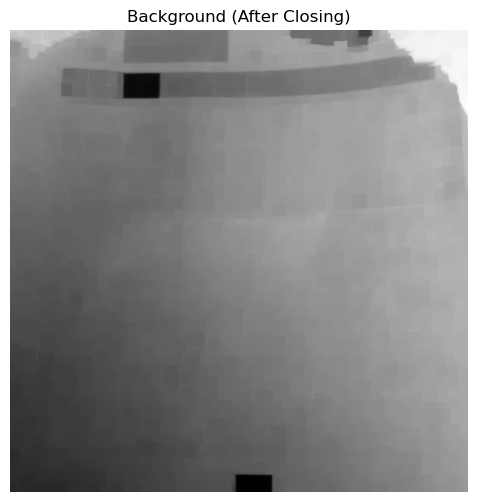

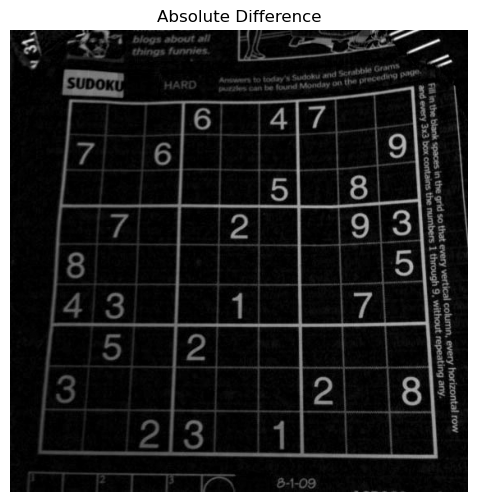

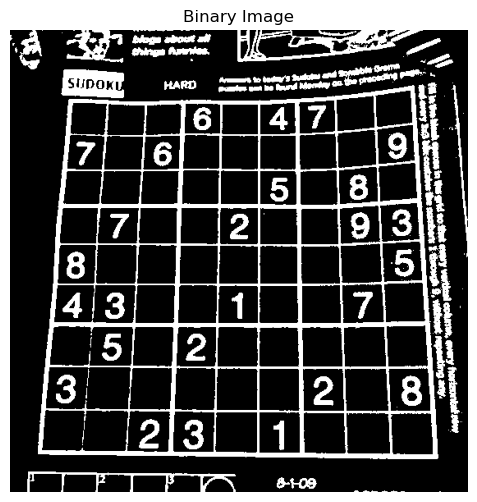

In [24]:
kernel = np.ones((3, 3), np.uint8)

back = cv2.dilate(src, kernel, iterations=6)
back = cv2.erode(back, kernel, iterations=6)

# 배경과 원본 차이
fore = cv2.absdiff(back, src)

# Threshold
_, binary = cv2.threshold(fore, 15, 255, cv2.THRESH_BINARY)


# 1️⃣ Background 출력
plt.figure(figsize=(6,6))
plt.imshow(back, cmap='gray')
plt.title("Background (After Closing)")
plt.axis("off")
plt.show()

# 2️⃣ Difference 출력
plt.figure(figsize=(6,6))
plt.imshow(fore, cmap='gray')
plt.title("Absolute Difference")
plt.axis("off")
plt.show()

# 3️⃣ Binary 출력
plt.figure(figsize=(6,6))
plt.imshow(binary, cmap='gray')
plt.title("Binary Image")
plt.axis("off")
plt.show()

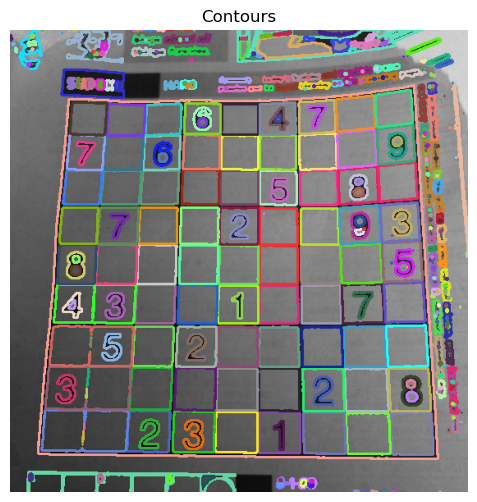

In [40]:
# grayscale → 3채널로 변환 (컬러 contour 그리기용)
dst = np.repeat(src[..., None], 3, axis=2)

# contour 찾기
contours, hierarchy = cv2.findContours(binary, 
                                       cv2.RETR_TREE, 
                                       cv2.CHAIN_APPROX_SIMPLE)

# 각 contour에 랜덤 색으로 그리기
for i in range(len(contours)):
    color = np.random.randint(20, 255, size=3).tolist()
    cv2.drawContours(dst, contours, i, color, thickness=2)
    

dst_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(dst_rgb)
plt.title("Contours")
plt.axis("off")
plt.show()

In [27]:
test = np.array([[0, 0], [10, 50], [0, 100], [100, 100], [100, 0]])
cv2.arcLength(test, True)
cv2.contourArea(test)
cv2.approxPolyDP(test, 9, True)

array([[[  0,   0]],

       [[ 10,  50]],

       [[  0, 100]],

       [[100, 100]],

       [[100,   0]]], dtype=int32)

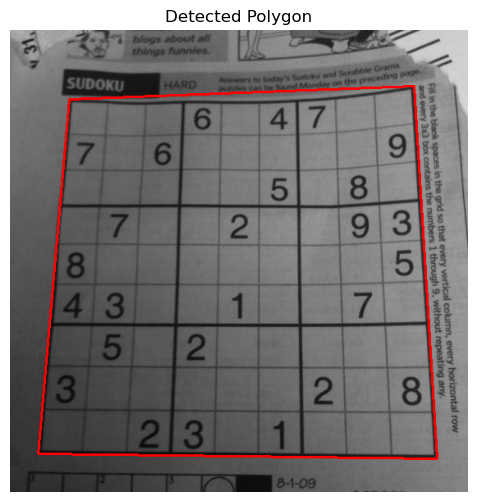

In [29]:
contours, hierarchy = cv2.findContours(binary, 
                                       cv2.RETR_TREE, 
                                       cv2.CHAIN_APPROX_SIMPLE)

hierarchy = hierarchy[0]

# 각 contour 둘레 계산
lengthes = [cv2.arcLength(con, True) for con in contours]

# 가장 긴 contour 선택
maxLen = np.max(lengthes)
maxIndex = np.argmax(lengthes)
maxCon = contours[maxIndex]

# 다각형 근사 (보통 2% 사용)
out = cv2.approxPolyDP(maxCon, maxLen * 0.02, True)

# grayscale → BGR 변환
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

# 빨간색으로 contour 그리기
cv2.drawContours(dst, [out], 0, (0, 0, 255), 2)


dst_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(dst_rgb)
plt.title("Detected Polygon")
plt.axis("off")
plt.show()

In [41]:
# out.shape
out = out.reshape(4, 2)
out

array([[492,  68],
       [ 72,  84],
       [ 34, 516],
       [520, 522]], dtype=int32)

In [42]:
# a = np.array([10, 20, 30, 40])
# a[[3, 2, 1, 0]]
out[[1, 0, 3, 2]]

array([[ 72,  84],
       [492,  68],
       [520, 522],
       [ 34, 516]], dtype=int32)

In [43]:
out = out.reshape(4, 2)

x = out[:, 0]
y = out[:, 1]
m = x - y
rt = np.argmax(m)
lb = np.argmin(m)
s = x + y
lt = np.argmin(s)
rb = np.argmax(s)

srcPoints = out[[lt, rt, rb, lb], :].astype(np.float32)
srcPoints


array([[ 72.,  84.],
       [492.,  68.],
       [520., 522.],
       [ 34., 516.]], dtype=float32)

In [44]:
[lt, rt, rb, lb]

[np.int64(1), np.int64(0), np.int64(3), np.int64(2)]

In [45]:
x

array([492,  72,  34, 520], dtype=int32)

In [46]:
y

array([ 68,  84, 516, 522], dtype=int32)

In [47]:
m

array([ 424,  -12, -482,   -2], dtype=int32)

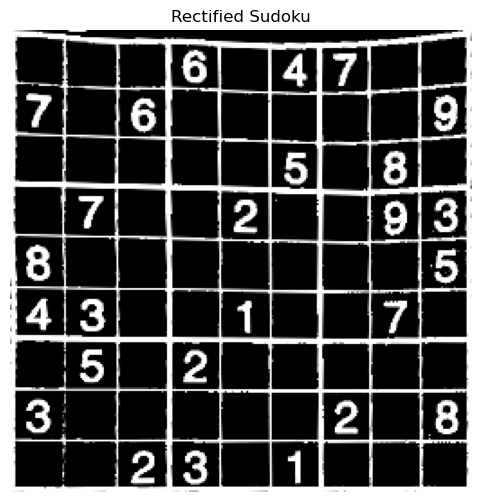

In [51]:
_, binary = cv2.threshold(fore, 15, 255, cv2.THRESH_BINARY)

dstPoints = np.array([[0, 0],
                      [255, 0],
                      [255, 255],
                      [0, 255]], np.float32)

M = cv2.getPerspectiveTransform(srcPoints, dstPoints)

rectified = cv2.warpPerspective(binary, M, (256, 256))

plt.figure(figsize=(6,6))
plt.imshow(rectified, cmap='gray')
plt.title("Rectified Sudoku")
plt.axis("off")
plt.show()


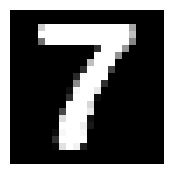

In [54]:
# template matching - pattern matching
temp = cv2.imread('seven.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(2,2))
plt.imshow(temp, cmap = 'gray')
plt.axis("off")
plt.show()

In [55]:
temp.shape

(22, 22)

In [56]:
res = cv2.matchTemplate(rectified // 255, temp // 255, cv2.TM_SQDIFF)
res.shape

(235, 235)

In [57]:
res.dtype

dtype('float32')

In [58]:
res.max()

np.float32(260.0)

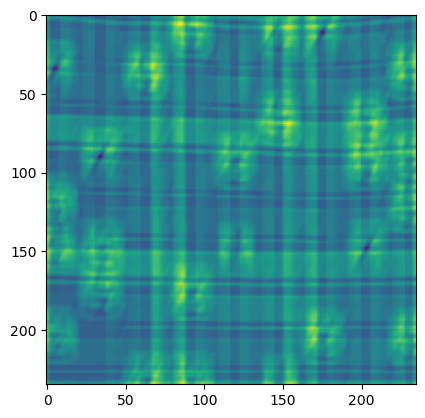

In [59]:
import matplotlib.pyplot as plt
plt.imshow(res)

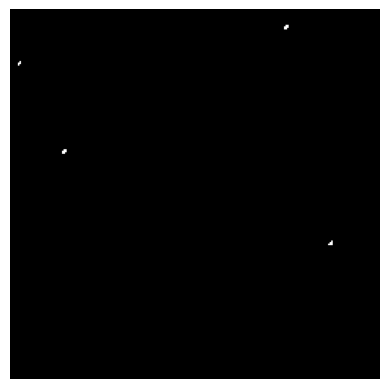

In [62]:
src2 = np.uint8(res < 50) * 255
plt.imshow(src2, cmap='gray')
plt.axis("off")
plt.show()

In [63]:
a = np.array([True, False, False, True, False])
np.where(a)[0]

array([0, 3])

In [64]:
a = np.zeros((100, 100))
a[10, 20] = 1
a[50, 60] = 1
a[70, 30] = 1
a = a.astype(bool)
np.where(a, 0, 255).astype(np.uint8)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], shape=(100, 100), dtype=uint8)

In [65]:
a = np.arange(9).reshape(3, 3)
#(1, 0), (2, 1), (0, 2)     (y1, x1),.... (yn, xn)
#[1, 2, 0], [0, 1, 2]       (x1... xn), (y1... yn)
a[[1, 2, 0], [0, 1, 2]]

array([3, 7, 2])

In [81]:
y, x = np.where(res < 50)
v = res[y, x] # res[res < 50]
points = list(zip(v, x, y))
np.array(points).shape

(24, 3)

In [67]:
(3, 3) < (2, 4)

False

In [68]:
a = [1, 2, 3]
b = [4, 5, 6]
c = a, b
list(zip(*c))

[(1, 4), (2, 5), (3, 6)]

In [69]:
size = (4, 3)
np.ones((3, 4)).reshape(size)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [70]:
a = [30, 70, 40, 80]
b = ['김', '이', '박', '정']
sa, sb = list(zip(*sorted(zip(b, a))))
sa, sb

(('김', '박', '이', '정'), (30, 40, 70, 80))

In [71]:
sorted(zip(b, a))

[('김', 30), ('박', 40), ('이', 70), ('정', 80)]

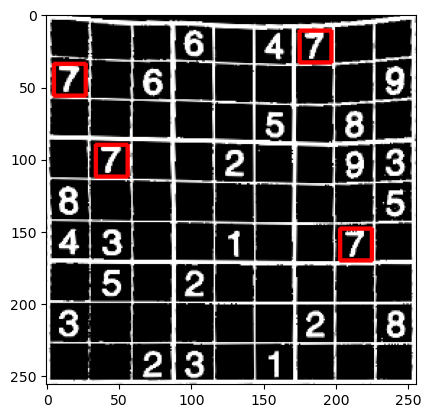

In [82]:
y, x = np.where(res < 50)
v = res[y, x]

points = [np.array([ax, ay]) for av, ax, ay in sorted(points)]

# points = []
# for av, ax, ay in sorted(zip(v, x, y)):
#     point = np.array([ax, ay])
#     points.append(point)

selected = []
for p in points:
    dup = False
    for s in selected:
        if sum((p - s) ** 2) < 20:
            dup = True
            break
    if not dup:
        selected.append(p)

selected = []
for p in points:
    for s in selected:
        if sum((p - s) ** 2) < 20:
            break
    else:
        selected.append(p)


dst = cv2.cvtColor(rectified, cv2.COLOR_GRAY2BGR)
for s in selected:
    p1 = tuple(s)
    p2 = tuple(s + 22)
    cv2.rectangle(dst, p1, p2, (255, 0, 0), 2)

plt.imshow(dst)